In [28]:
from bib import *
import numpy as np
import pandas as pd
import sklearn.linear_model as sklin

# RMSE de la moyenne

In [5]:
xtrains,ytrains,xvals,yvals,xtest,ytest=split(('CHL 1','THERM 1','SSH','SR','WS'),
                                               ['CHL '+ str(i) for i in range(2,19)]+['5days'])
ytrains,yvals,ytest=applyToy(lambda x:np.log(x)/np.log(10),ytrains,yvals,ytest)

def validate2(ytrains,yvals):
    fold_evaluation=[]
    for yt,yv in zip(ytrains,yvals):
        yp = yt.groupby(yt['5days']).mean()
        yp = np.exp(yp*np.log(10))
        yv = np.exp(yv.drop('5days', axis=1)*np.log(10))
        fold_evaluation.append(evaluate(yp,yv))
        print(evaluate(yp,yv))
    return np.mean(fold_evaluation),np.std(fold_evaluation)

In [6]:
validate2(ytrains,yvals)

0.07747666143529126
0.09789174339977277
0.11715999590676757
0.12827418289440456
0.08481053560285194
0.09816471947156402
0.059737287643447476
0.08700878450039236
0.09953539011833669
0.05445375007017498
0.10519877961163224
0.128691482255466
0.07560566106885863
0.0749760797297847
0.0810328175463774
0.06259418984008278


(0.08953825381845035, 0.022056107789203295)

Si on utilisait seulement la moyenne comme estimateur, la RMSE serait de **0.0895+-0.0221**. Un autre estimateur avec une RMSE supérieure et une faible variance de celle-ci serait biaisé.

# Régression linéaire

In [7]:
xtrains,ytrains,xvals,yvals,xtest,ytest=split(('CHL 1','THERM 1','SSH','SR','WS'),
                                               ['CHL '+ str(i) for i in range(2,19)])
ytrains,yvals,ytest=applyToy(lambda x:np.log(x)/np.log(10),ytrains,yvals,ytest)

In [34]:
def validate(model,xtrains,ytrains,xvals,yvals):
    fold_evaluation=[]
    for xt,yt,xv,yv in zip(xtrains,ytrains,xvals,yvals):
        model.fit(xt,yt)
        yp = model.predict(xv)
        yp = np.exp(yp*np.log(10))
        yv = np.exp(yv*np.log(10))
        fold_evaluation.append(evaluate(yp,yv))
        print(evaluate(yp,yv))
    return np.mean(fold_evaluation),np.std(fold_evaluation)

In [9]:
print('Résultats de validation pour une régression linéaire: %.4f+-%.4f'%\
      validate(sklin.LinearRegression(),xtrains,ytrains,xvals,yvals))

0.11078960496832767
0.09861097088324218
0.09813218974389697
0.14354621456872915
0.12914430567977203
0.11525809867665318
0.08764406376387214
0.10215357647748331
0.07902071680311216
0.0858810771950108
0.07751837336047242
0.08516921477521149
0.08446455245919686
0.07850380954942486
0.10802535033046394
0.08431333471297689
Résultats de validation pour une régression linéaire: 0.0980+-0.0187


La RMSE moyenne de la régression linéaire est supérieure à celle d'une simple moyenne, et son écart-type est inférieur, ce qui indique que le modèle est biaisé et il ne capte pas une partie les informations des données.

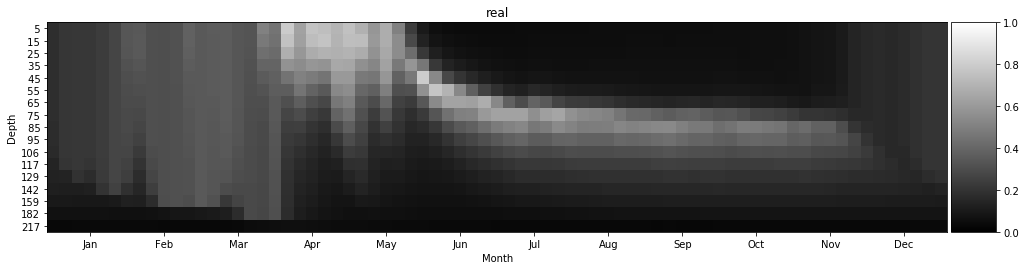

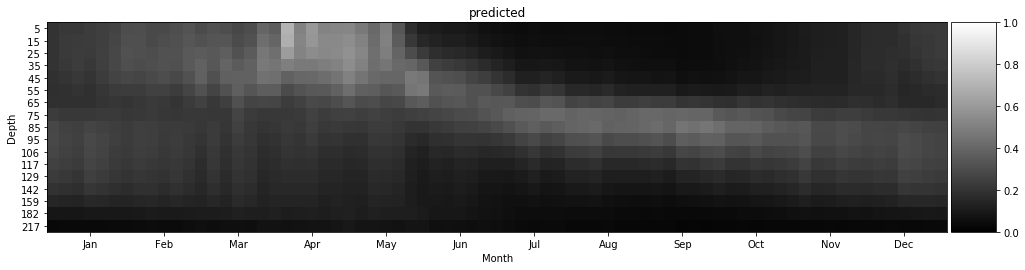

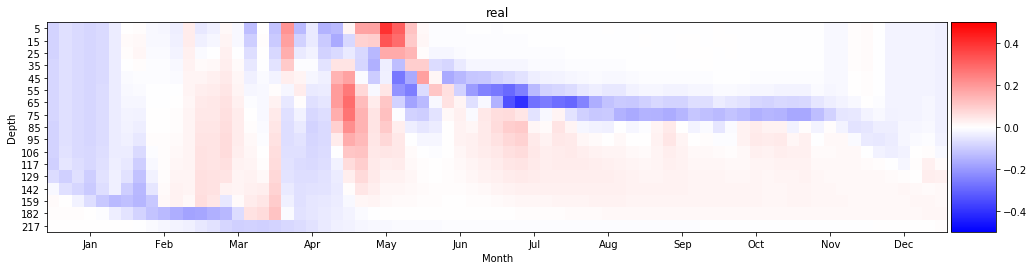

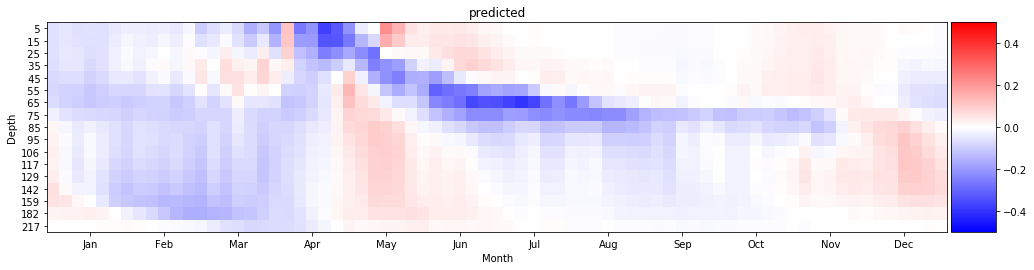

In [10]:
model = sklin.LinearRegression()
model.fit(xtrains[0].values, ytrains[0].values)

yp = model.predict(xtest)
plotYear(np.exp(ytest*np.log(10)),title='real')
plotYear(np.exp(yp*np.log(10)),title='predicted')
climato(np.exp(ytest*np.log(10)).values, title='real')
climato(np.exp(yp*np.log(10)), title='predicted')

Les différents graphiques montrent que la régression linéaire sous-estime souvent les effets saisonniers. Il y a aussi des discontinuités temporelles.

In [32]:
#model.coef_

# K plus proches voisins

### Recherche du k optimal

1
0.1058758552721739
0.12055141743530016
0.128241717575289
0.13519602867123195
0.09319581082828009
0.12232755667896021
0.10017534495717254
0.108941841803787
0.10815510966207224
0.09768810433621214
0.12088017708305948
0.12854786026263226
0.1017771527138213
0.11087034484782617
0.11594281666599997
0.10991267248284677

 RMSE pour k = 1 :  0.11301748820479157
2
0.09811261781575106
0.11589012351237633
0.09872490618814257
0.1301893033388136
0.08540257151422195
0.11005930033232583
0.0794200687261595
0.09265203700223675
0.08386505890190063
0.07592222187384542
0.10091136870158693
0.11614886849765818
0.08185948724615402
0.09530163508957944
0.10022171679365266
0.10004431145548365

 RMSE pour k = 2 :  0.09779534981186803
3
0.09509090885035545
0.11076040325619858
0.08929309937432221
0.12912173814433678
0.08113158776449668
0.09614479096798963
0.07444948431857892
0.09032716365948264
0.08099543545979446
0.06918801146103998
0.09214783807738912
0.11336852951249099
0.07722591586372705
0.08049574387258487


0.08709684837189478

 RMSE pour k = 23 :  0.08910570643840462
24
0.09520972028670908
0.10098121405227989
0.07885955329197325
0.13371255987528555
0.10089368155725106
0.10375297473361954
0.07229382433562143
0.08568362361508855
0.0702954670829363
0.06873612202578563
0.07731044085331941
0.09809746399873452
0.07628994579431848
0.07765624373610726
0.09807138315238305
0.08607158819125317

 RMSE pour k = 24 :  0.08899473791141663
25
0.09525589063769095
0.10054559439936042
0.07903152998326174
0.13374783715045027
0.10120557431113748
0.10303716549481824
0.07261238712591571
0.08594080416400819
0.07020750180344398
0.06869329219334777
0.07784400690906675
0.09758394840322712
0.07720412696551789
0.07805272557652358
0.09801917507857177
0.08525515632991125

 RMSE pour k = 25 :  0.08901479478289083
26
0.09507208246897181
0.10078484779443686
0.07961720330917049
0.133399408680816
0.10159629961650463
0.10361916117588953
0.07298668981101597
0.08683204651437404
0.0701664057902581
0.06888386145275428
0.0779939

0.08084589258206061
0.08067259615717862
0.10349197680867726
0.08723654627741037

 RMSE pour k = 46 :  0.09278109104610421
47
0.1053436238456174
0.10555746948750441
0.0817741563913143
0.13462851600376063
0.10699671729292848
0.10694295952748854
0.07580397128630378
0.08898413935886282
0.07284250485526149
0.07723043837656048
0.08015940123308152
0.09939731719359968
0.08098225428274747
0.08132132662956654
0.10367208427994118
0.08715857116700976

 RMSE pour k = 47 :  0.09304971570072178
48
0.1058104076353153
0.10622273818215286
0.08230949840671473
0.1351513615355205
0.10729402716662509
0.1073365527555553
0.0760870602068982
0.08909712132740553
0.07215505575078238
0.0771009438873507
0.08050876577239485
0.09970946334628834
0.08129985433297293
0.08149203094447127
0.10389030420724135
0.0870247133290403

 RMSE pour k = 48 :  0.0932806186741706
49
0.10576423590504332
0.10617631397020093
0.08290100839233955
0.13528627484949188
0.10733953169609083
0.10745492408962388
0.07602258727057619
0.089013918648

0.08984802917594482
0.07505199283036681
0.07990376870841479
0.08233795852165338
0.10090180524308869
0.08377190192356858
0.0827665475727568
0.10689014324393407
0.08973368328120361

 RMSE pour k = 69 :  0.09572373184221215
70
0.1100908989513085
0.10896934600232953
0.08415139885639493
0.139421230469035
0.11157353870362813
0.11021819608111376
0.07763455770674242
0.08994265939509556
0.0748166539231375
0.08020119399174205
0.0823533740684015
0.10084747423622772
0.08388174834674789
0.08310045066447029
0.10723292949194244
0.08990295665862397

 RMSE pour k = 70 :  0.09589616297168382
71
0.11049658698770072
0.10918981299909532
0.08430718436133666
0.13935183791587616
0.11192320880748502
0.1103201157221894
0.07790132026663041
0.09011675451789397
0.07509087974892206
0.0805605122353811
0.082592537460534
0.10088219208154722
0.08413510002480025
0.08318464198204517
0.10733677952828864
0.09000547892667969

 RMSE pour k = 71 :  0.09608718397290036
72
0.11054146737087314
0.10937644011352399
0.0844753573850

0.08679838086864203
0.14256612144293473
0.11578138085384582
0.11500328655971144
0.08255893244226926
0.09192793245013905
0.07776068112845527
0.0834261282878652
0.08421133134646808
0.10223259008968086
0.08811460137074643
0.0861995695375755
0.11078281435304475
0.08984761858164014

 RMSE pour k = 92 :  0.09898798621234209
93
0.11430488216792185
0.11244675281630469
0.08706692707876151
0.14279110318836677
0.11572156684729211
0.1151362705889532
0.08275266180384246
0.09210045651235013
0.07788549884068233
0.0834958082097254
0.08438943510169457
0.10242460974016872
0.08815775683463496
0.08634927482806905
0.11086677326590566
0.08968894840761757

 RMSE pour k = 93 :  0.09909867038951818
94
0.11461849354232577
0.11245371538495216
0.08696253171476227
0.14307040094133835
0.11578810236141435
0.11527444731312363
0.08283859840561705
0.09218388499031001
0.07791616835198477
0.08350598562959896
0.08441632420615434
0.10252630226188973
0.08815983957795485
0.08654555927519553
0.1109100196945361
0.0896608794391

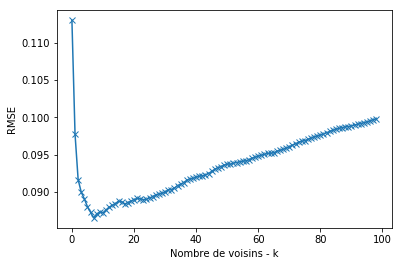

8 0.0865380510039499


In [12]:
from sklearn.neighbors import KNeighborsRegressor

def k_optimal_kpp(xtrains, ytrains, xvals, yvals):
    k_opt = 1000
    score_opt = 1000
    L = []
    for k in range(1, 100):
        print(k)
        classifieur_tp = KNeighborsRegressor(n_neighbors=k)
#         classifieur_tp.fit(Xapp, Yapp)
#         #print("\n Prédiction pour  k = {0} : ".format(k), classifieur_tp.predict(hx_hy[:, 380:].T))
#         pred = classifieur_tp.predict(Xtest)
#         score = evaluate(np.exp(pred*np.log(10)), np.exp(Ytest*np.log(10)))
        score, std = validate(KNeighborsRegressor(n_neighbors=k),xtrains,ytrains,xvals,yvals)
        L.append(score)
        print("\n RMSE pour k = {0} : ".format(k), score)
        if score < score_opt:
            score_opt = score
            k_opt = k
    plt.plot(L, 'x-')
    plt.xlabel('Nombre de voisins - k')
    plt.ylabel("RMSE")

    return k_opt, score_opt, L


k_opt, score_opt, L = k_optimal_kpp(xtrains, ytrains, xvals, yvals)
plt.show()

print(k_opt, score_opt)

In [13]:
validate(KNeighborsRegressor(n_neighbors=k_opt),xtrains,ytrains,xvals,yvals)

0.08661983556135121
0.09801331265881438
0.08014126366335657
0.13188581006484307
0.0874442216425828
0.10077777596889997
0.07102693612779912
0.08826605658212984
0.07327381356054179
0.06086487565598367
0.08424874634092974
0.10240864379365208
0.0702936814749708
0.07473976680411853
0.08836988929411908
0.0862341868691057


(0.0865380510039499, 0.01615335420720943)

Le nombre optimal de voisins est **8**, et ce modèle présente une RMSE moyenne de **0.0865+-0.0162**, il a donc une performance presque équivalente à une moyenne. Ceci peut s'expliquer par le fait que ce modèle effectue une interpolation locale pour prédire.

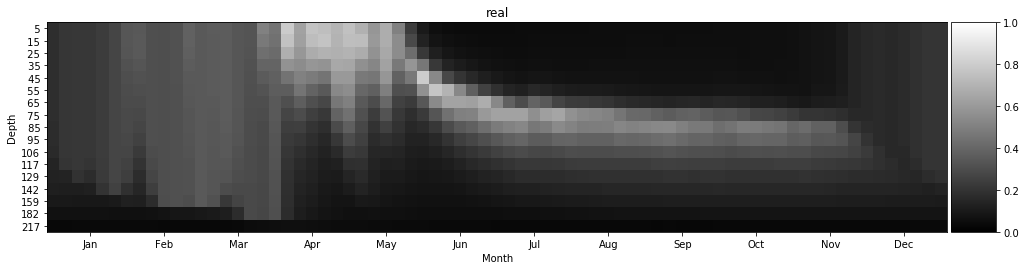

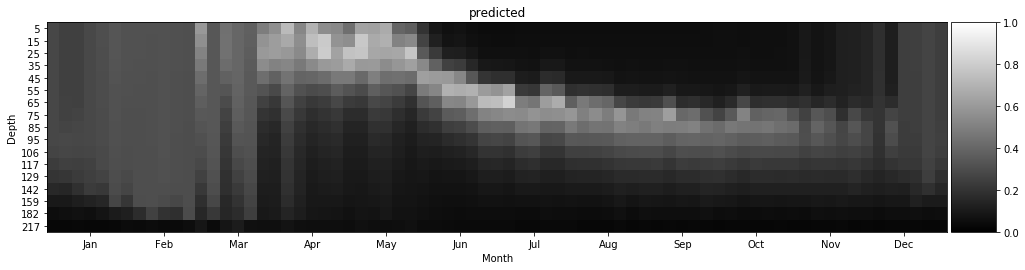

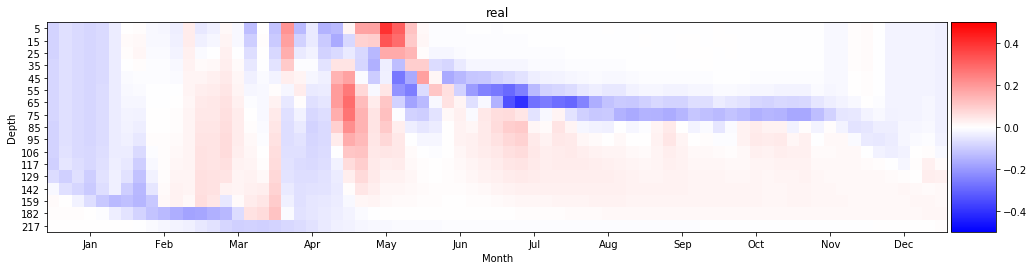

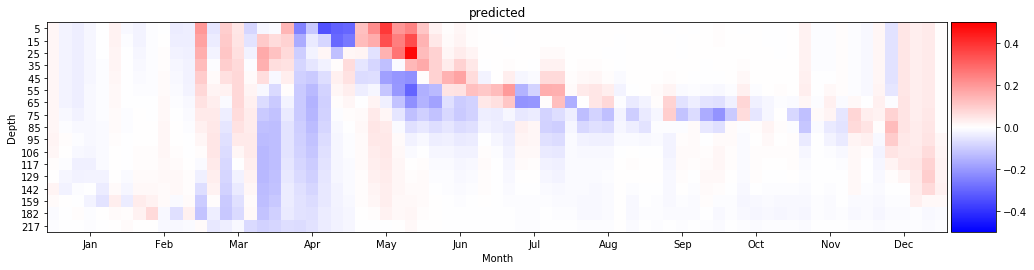

In [14]:
model = KNeighborsRegressor(n_neighbors=k_opt)
model.fit(xtrains[0].values, ytrains[0].values)

yp = model.predict(xtest)
plotYear(np.exp(ytest*np.log(10)),title='real')
plotYear(np.exp(yp*np.log(10)),title='predicted')
climato(np.exp(ytest*np.log(10)).values, title='real')
climato(np.exp(yp*np.log(10)), title='predicted')

Ce modèle est plus proche de la moyenne que les valeurs réelles selon les graphiques où on a enlevé la climatologie. Ceci indique qu'il prend moins en compte la saisonnalité. On remarque aussi des discontinuités temporelles sur le graphique des profils prédits.

# Random Forest

## Modèle par défaut

0.057288851227325105
0.0632420583519789
0.05619942702065176
0.1139079303120775
0.10374385072873397
0.06587430692921378
0.050171301785420994
0.07058526047050641
0.053541876466972026
0.04780718360037929
0.04200984006077033
0.06201301190733441
0.043550426247195746
0.05035651660060667
0.04990514138631655
0.053079435127835695
(0.061454776138957445, 0.01951385316287997)


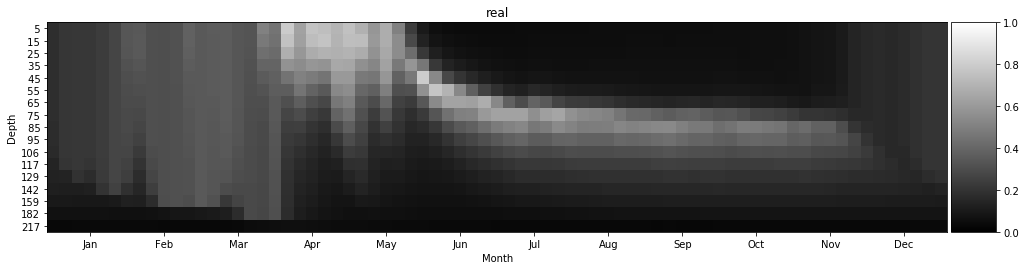

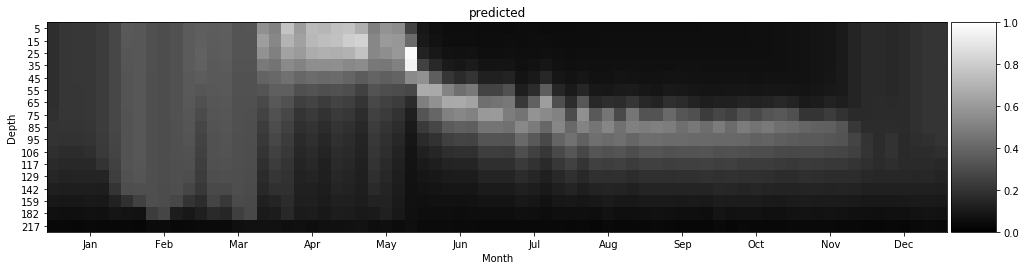

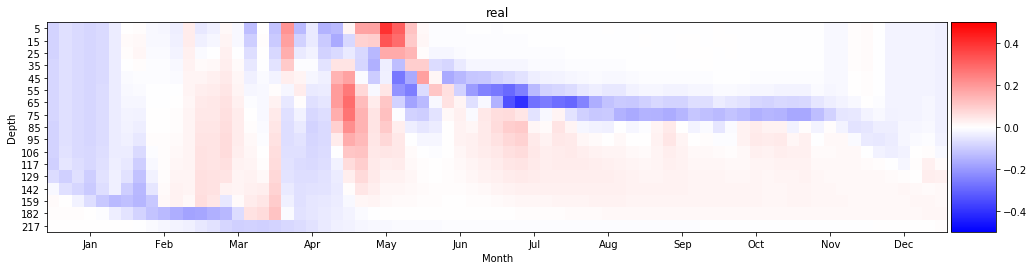

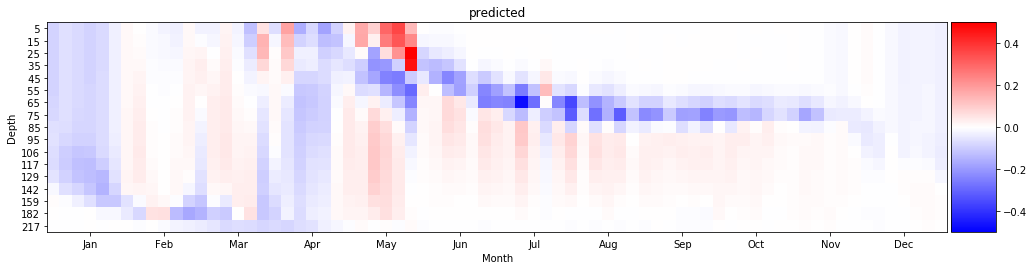

In [35]:
from sklearn.ensemble import RandomForestRegressor


### default Random Forest 
model = RandomForestRegressor()
model.fit(xtrains[0].values, ytrains[0].values)

print(validate(model,xtrains,ytrains,xvals,yvals ))

yp = model.predict(xtest)
plotYear(np.exp(ytest*np.log(10)),title='real')
plotYear(np.exp(yp*np.log(10)),title='predicted')
climato(np.exp(ytest*np.log(10)).values, title='real')
climato(np.exp(yp*np.log(10)), title='predicted')

Le modèle est significativement plus performant que les précédents. Les discontinuités temporelles sont moins évidentes, et les prédictions sont plus proches des valeurs réelles. Cet estimateur, comme les autres, a surtout difficulté pour prédire les valeurs le plus grandes, qui sont aussi plus rares, et a donc tendance à sous-estimer.

## Importance des variables

In [36]:
model.feature_importances_

array([0.19005931, 0.59141594, 0.04793968, 0.15418816, 0.0163969 ])

La variable avec la plus grande importance est la température de surface, suivie de la chlorophylle de surface et la radiation solaire. Les varaibles présentant moins d'importance selon ce modèle sont la vitesse du vent et l'altitude de la mer.

## Réglage des hyperparamètres

In [22]:
# #### Cross Validation 

# Fichier rf_cv.py

# #from tqdm import tqdm_notebook
# from sklearn.multioutput import MultiOutputRegressor

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 50)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# grid = {'n_estimators': n_estimators,
#         'max_features': max_features,
#         'max_depth': max_depth,
#         'min_samples_split': min_samples_split,
#         'min_samples_leaf': min_samples_leaf,
#         'bootstrap': bootstrap}

# rf = RandomForestRegressor()

In [23]:
# def validate(params,xtrains,ytrains,xvals,yvals):
#     fold_evaluation=[]
#     first= True
#     for xt,yt,xv,yv in zip(xtrains,ytrains,xvals,yvals):
        

    
#         model=RandomForestRegressor(n_estimators=params['n_estimators'], max_depth=params['max_depth'], 
#                                     min_samples_split=params['min_samples_split'], 
#                                     min_samples_leaf=params['min_samples_leaf'], 
#                                     max_features=params['max_features'], bootstrap=params['bootstrap'])
#         multioutputregressor = MultiOutputRegressor(model,n_jobs=-1).fit(xt.values,yt.values)
#         yp=multioutputregressor.predict(xv)
#         #check error in original space
            
#         fold_evaluation.append(evaluate(yp,yv))
#         if first:
#             print(evaluate(yp,yv))
#             first=False
        
#     return np.mean(fold_evaluation),np.std(fold_evaluation)


In [31]:
# i=0
# while True:
#     params={}
#     for key in grid:
#         params[key]=grid[key][i%len(grid[key])]
# #         print(i%len(parameters_for_testing[key]))
#         i+=13
#     print(params)
#     error,std=validate(params,xtrains,ytrains,xvals,yvals)
#     print('\t error: %.5f +- %.5f' % (error,std))